# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\lisal\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object
html = browser.html
page_soup = soup(html, 'html.parser')

# Find the table(s) on the page
tables = page_soup.findAll('table')

# Using the first table
if tables:
    table = tables[0]
    rows = table.findAll('tr')
    
    # Initialize a list to store all rows of data
    data = []
    
    for row in rows:
        # For each row, find all cells
        cells = row.findAll(['td', 'th'])
        # Extract the text from each cell and add to the row data list
        row_data = [cell.text for cell in cells]
        # Add the row data to the overall data list
        data.append(row_data)

    # Convert the data to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(data[1:], columns=data[0]) 
    
    # Display the DataFrame
    print(df)
else:
    print("Table not found")

# It's a good practice to close the browser when done
browser.quit()



        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
import pandas as pd

data[0] = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Convert data types if necessary, for example:
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Display the first few rows to confirm the DataFrame is assembled correctly
print(df.head())

# Optional: Convert `terrestrial_date` to a datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Confirm the DataFrame's structure and data types
print(df.info())



   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)


In [9]:
# Confirm DataFrame was created successfully
# Display the first few rows of the DataFrame
print(df.head())

# Check the shape of the DataFrame
print(f"DataFrame shape: {df.shape}")

# Verify data types of the columns
print(df.dtypes)

# Check for missing values in each column
print(df.isnull().sum())



   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0
DataFrame shape: (1867, 7)
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object
id                  0
terrestrial_date    0
sol                 0
ls                  0
month               0
min_temp            0
pressure            0
dtype: int64


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)



id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [11]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
print(df['month'].value_counts().sort_index())


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. # Count unique Martian days (sols) in the dataset
unique_sols = df['sol'].nunique()

print(f"There are {unique_sols} Martian days' worth of data.")


There are 1867 Martian days' worth of data.


In [15]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print("Average low temperature by month on Mars:")
print(average_low_temp_by_month)



Average low temperature by month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


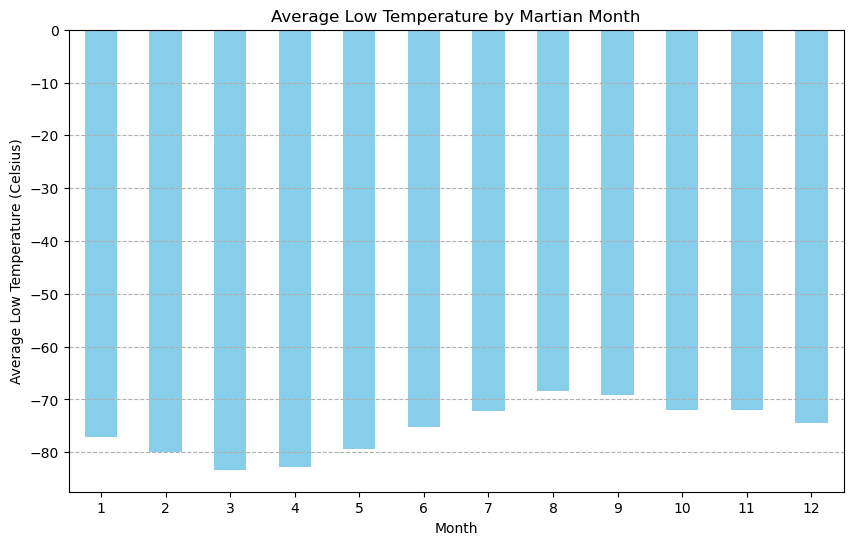

In [16]:
# Plot the average temperature by month
import matplotlib.pyplot as plt
# Plot the average low temperature by month
average_low_temp_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=0)  # Keep the month labels horizontal for readability
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


In [17]:
# Identify the coldest and hottest months in Curiosity's location

# Identify the coldest month
coldest_month = average_low_temp_by_month.idxmin()
coldest_month_temp = average_low_temp_by_month.min()

# Identify the hottest month
hottest_month = average_low_temp_by_month.idxmax()
hottest_month_temp = average_low_temp_by_month.max()

print(f"The coldest month is {coldest_month} with an average low temperature of {coldest_month_temp} Celsius.")
print(f"The hottest month is {hottest_month} with an average low temperature of {hottest_month_temp} Celsius.")



The coldest month is 3 with an average low temperature of -83.30729166666667 Celsius.
The hottest month is 8 with an average low temperature of -68.38297872340425 Celsius.


In [18]:
# 4. # Calculate the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month)


Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [19]:
# Plot the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month)



Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [20]:
# Define the length of a Martian year in Earth days
martian_year_in_earth_days = 687

# Print the information
print(f"A Martian year is approximately {martian_year_in_earth_days} Earth days long.")


A Martian year is approximately 687 Earth days long.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
# name for my CSV file
file_path = 'mars_data.csv'

# Write the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"Data has been written to {file_path}")


Data has been written to mars_data.csv


In [22]:
browser.quit()